In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load in the data and scale it
original_df = pd.read_csv('data_indiaplant_1_3000.csv', index_col=0)
#df.dropna(inplace=True)
original_df

,Plant_Id,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
0,1,Epiphyllum oxypetalum,"Queen Of The Night, Dutchmans-pipe Cactus",Marathi - Brahma Kamal,"Cacti & Succulents, Shrubs, Indoor Plants",Rhipsalidopsis,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"May, June, July, August, September",Green,1 to 2 meters,1 to 2 meters,"Irregular, Upright or Erect",NaN,"Fragrant flowers or leaves, Auspicious or Feng...","Origin - Mexico to Brazil, Large, flat, thin, ...",Bright indirect sunlight to direct sunlight is...
1,2,Euphorbia grandicornis,Cow Horn Euphorbia,NaN,"Cacti & Succulents, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"September, October, November, Flowers are inco...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Animals will not eat, Thorny or Spiny","Nation-Africa, Asia, Shrub grow-3 feet tall, B...","Full sun min 4 hours of sunlight, Sand in pott..."
2,4,Euphorbia milli thai hybrid,Crown Of Thorns New Hybrids,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",This page is dedicated to no particular variet...,Full to diffused sunlight best. Minimum 3 to 4...
3,5,Euphorbia milli speciosa rubra,Crown Of Thorns - Red,NaN,"Cacti & Succulents, Flowering Pot Plants, Shrubs",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,50 cms to 100 cms,50 cms to 100 cms,Spreading,NaN,"Good for Hedges and Borders, Good for Edges ie...","A small flowered type of the euphorbia milli.,...",Full to diffused sunlight best. Minimum 3 to 4...
4,7,Euphorbia milli thai hybrid orange,Euphorbia Milli Thai Hyb Orange,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,"Sun growing, Semi shade","Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,1 to 2 meters,50 cms to 100 cms,Upright or Erect,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",Extremely large flowered plants of the Thai go...,Full to diffused sunlight best. Minimum 3 to 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2996,Garcinia indica variegated,Garcinia Variegated,"Hindi - Kokum Variegated, Marathi - Bheranda, ...","Trees, Medicinal Plants, Shrubs",Guttiferae or Nutmeg family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, White",4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Indigenous (native to India), Auspicious or Fe...",This is a variegated leaf form of the regular ...,"Grows best in red lateratic fertile soils., Re..."
906,2997,Ficus cyatbistipula,NaN,NaN,"Shrubs, Trees",Moraceae or Fig family,"Sun growing, Semi shade","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,2 to 4 meters,Upright or Erect,NaN,"Good for screening, Good for Hedges and Border...","A large leaved ficus., It can be distinguished...",As with most ficus this one too is easy to gro...
907,2998,Zephyranthes candida flava,Zephyranthes Cream Color,NaN,"Lilies & Bulbous plants, Groundcovers, Bamboos...",Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,"Spreading, Upright or Erect",NaN,"Good for Edges ie very small hedge or border, ...","Native of Americas., Off white flowers that ar...","Plants are very hardy and 

In [8]:
# Load in the data and scale it
df = pd.read_csv('Encoded_data_3000_V2.csv', index_col=0)


In [9]:
df

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [14]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,Category_Groundcovers,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
0,0.0,0.0,0.235702,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.235702,0.0,0.0,0.0,0.0,0.000000,0.235702,0.0
1,0.0,0.0,0.258199,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.258199,0.0
2,0.0,0.0,0.267261,0.0,0.0,0.0,0.267261,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.267261,0.0
3,0.0,0.0,0.267261,0.0,0.0,0.0,0.267261,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.267261,0.000000,0.0
4,0.0,0.0,0.267261,0.0,0.0,0.0,0.267261,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.267261,0.0


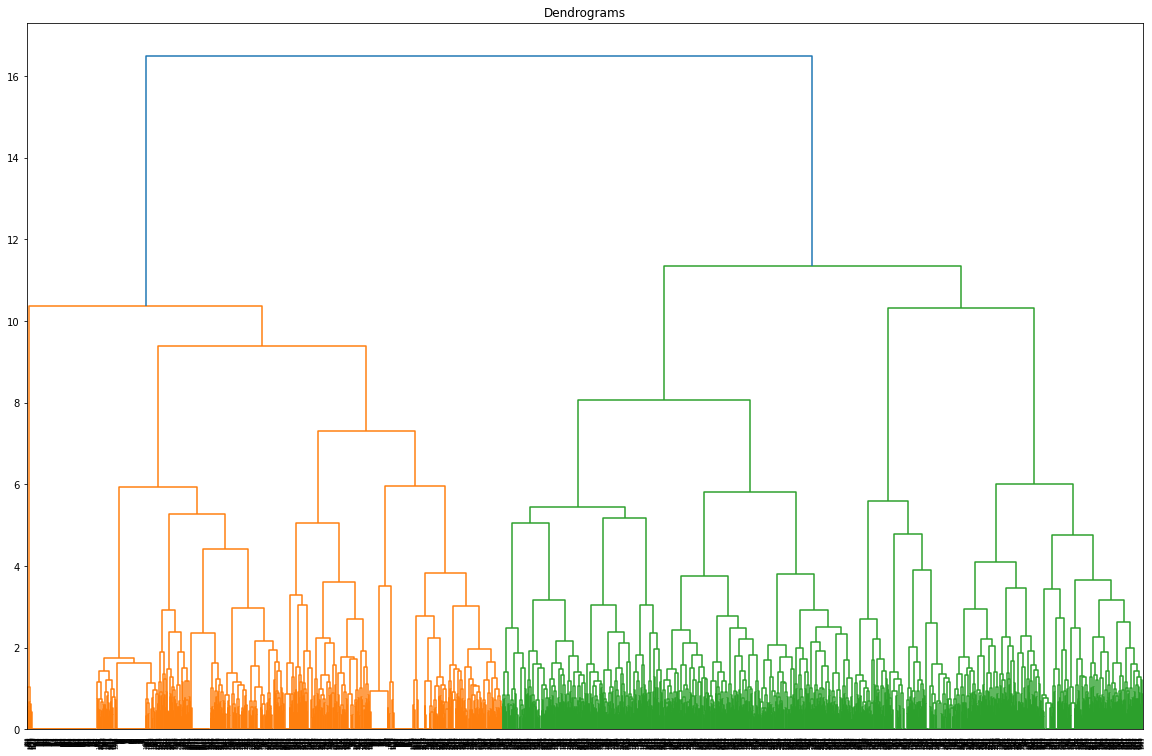

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 13))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

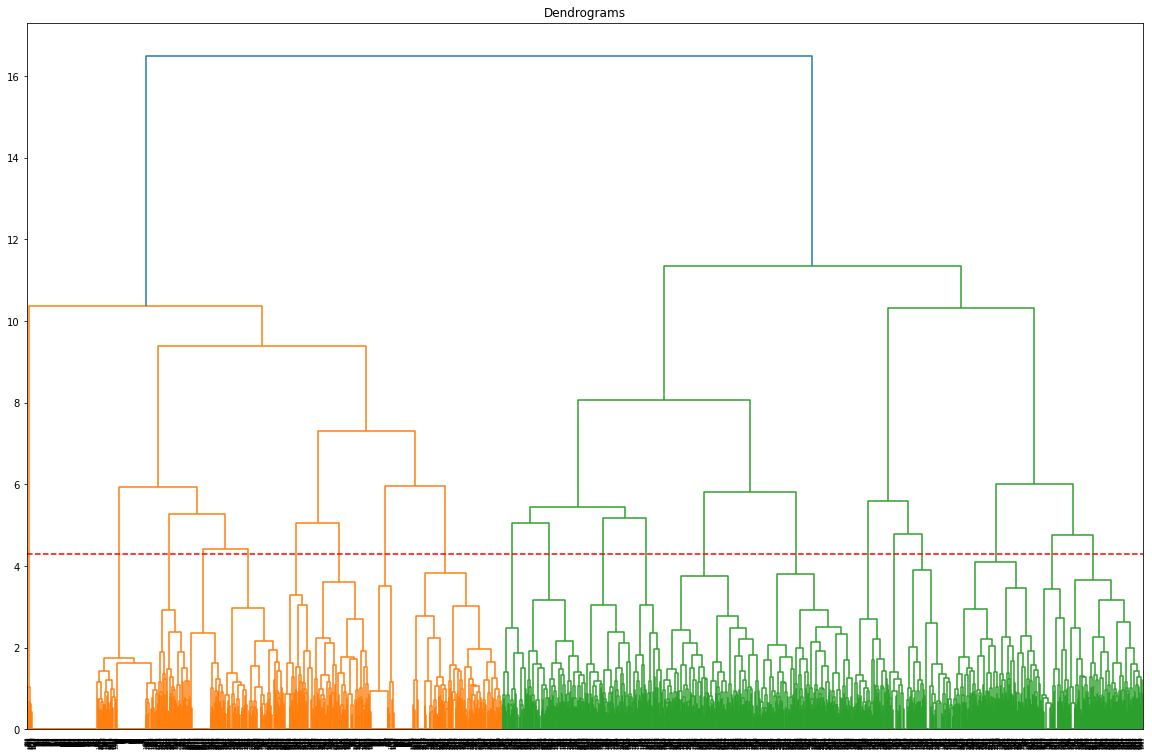

In [18]:
plt.figure(figsize=(20, 13))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=4.3, color='r', linestyle='--')

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=21, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

/home/riya/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([ 0, 13,  2, ...,  6,  5,  0])

In [23]:
# Example cluster labels
cluster_labels = cluster.labels_

In [24]:
cluster_labels

array([ 0, 13,  2, ...,  6,  5,  0])

In [30]:
data_cluster = df.copy()

In [31]:
data_cluster.insert(0, 'Plant_Id', data_cluster.index)
data_cluster

,Plant_Id,Category_Bamboos,Category_Bromeliads,Category_Cacti & Succulents,Category_Climbers,Category_Creepers & Vines,Category_Ferns,Category_Flowering Pot Plants,Category_Fruit Plants,Category_Grasses & Grass like plants,...,Plant_Form_Climbing or growing on support,Plant_Form_Columnar,Plant_Form_Irregular,Plant_Form_Low spreading,Plant_Form_Oval,Plant_Form_Pyramidal,Plant_Form_Spherical or rounded,Plant_Form_Spreading,Plant_Form_Upright or Erect,Plant_Form_Weeping
Plant_Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,7,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,2997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2998,2998,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [32]:
# Add cluster labels to your original DataFrame
data_cluster['Cluster'] = cluster_labels

In [33]:
# Cluster details
cluster_details = data_cluster.groupby('Cluster').agg({
    'Plant_Id': 'count'  # Count the number of data points in each cluster
})
print(cluster_details)

         Plant_Id
Cluster          
0             187
1              99
2             190
3             199
4              92
5             206
6             120
7              99
8              61
9              58
10            131
11            156
12             75
13             62
14             68
15            147
16             52
17            127
18             37
19            125
20             71


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

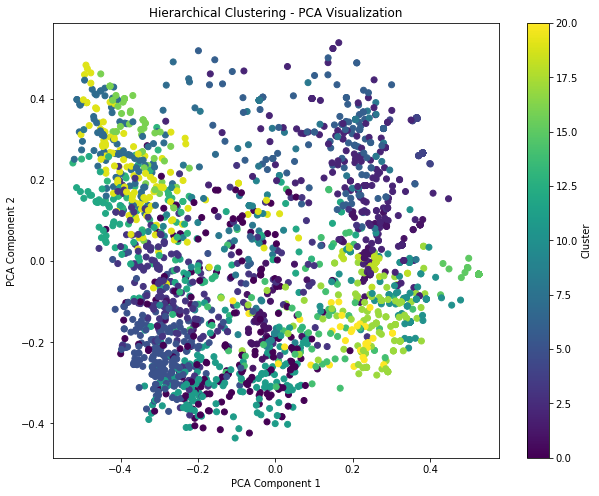

In [36]:
# Visualizing clusters using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering - PCA Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [37]:
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.16813459254959714


In [41]:
data_cluster.columns

Index(['Plant_Id', 'Category_Bamboos', 'Category_Bromeliads',
       'Category_Cacti & Succulents', 'Category_Climbers',
       'Category_Creepers & Vines', 'Category_Ferns',
       'Category_Flowering Pot Plants', 'Category_Fruit Plants',
       'Category_Grasses & Grass like plants', 'Category_Groundcovers',
       'Category_Indoor Plants', 'Category_Lilies & Bulbous plants',
       'Category_Medicinal Plants', 'Category_Orchids',
       'Category_Palms and Cycads', 'Category_Rose Climbers',
       'Category_Rose Floribundas', 'Category_Rose Hybrid Teas',
       'Category_Rose Miniatures', 'Category_Shrubs',
       'Category_Spice plants & edible Herbs',
       'Category_Terrific Tropicals  The Ideal Gifts', 'Category_Trees',
       'Category_Vegetable', 'Category_Water & Aquatic Plants',
       'Category_lawns', 'Light_Low light tolerant', 'Light_Semi shade',
       'Light_Shade growing', 'Light_Sun growing', 'Water_Can tolerate less',
       'Water_Can tolerate more', 'Water_Normal

In [53]:
data_cluster['Cluster'].nunique()

21

In [81]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a DataFrame `data` containing plant data and cluster labels
#data['Cluster'] = cluster_labels

def recommend_plants(input_values, data, cluster_labels, top_n=20):
    # Filter data based on input values
    filtered_data = data.copy()
#     for column, value in input_values.items():
#         if column in filtered_data.columns:
#             filtered_data = filtered_data[filtered_data[column] == value]

#     if len(filtered_data) == 0:
#         print("No matching plants found for the input criteria.")
#         return None
    print(filtered_data.shape)
    # Prepare input vector for cosine similarity
    input_vector = pd.DataFrame(index=[0], columns=data.columns)
    input_vector = input_vector.fillna(0)  # Fill with zeros initially
    input_vector = input_vector.drop(columns=['Cluster'])
    for column, value in input_values.items():
        if column in input_vector.columns:
            input_vector.at[0, column] = 1  # Set the input value to 1 in the input vector
    print(input_vector.values)
    # Calculate cosine similarity between input vector and cluster centroids
    cluster_centroids = filtered_data.groupby('Cluster').mean()
    print(cluster_centroids.shape)
    # Reduce cluster_centroids to the same columns as input_vector
    #relevant_cluster_centroids = cluster_centroids[input_values.keys()]
    
    #input_vector = pd.DataFrame(input_values, index=[0])
    similarity_scores = cosine_similarity(input_vector, cluster_centroids.values)

    # Get top cluster based on similarity score
    top_cluster_idx = similarity_scores.argmax()
    top_cluster_label = cluster_centroids.index[top_cluster_idx]

    
#     # Filter data based on top cluster
#     recommended_plants = data[data['Cluster'] == top_cluster_label].head(top_n)

    # Filter data based on top cluster
    top_cluster_data = data[data['Cluster'] == top_cluster_label]
    top_cluster_data = top_cluster_data.drop(columns=['Cluster'])
    print(input_vector.columns)
    #input_vector = pd.DataFrame(input_values, index=[0])
    similarity_scores_grp = cosine_similarity(input_vector, top_cluster_data.values)
    
    top_cluster_data['Similarity'] = similarity_scores_grp.flatten()

    # Sort by similarity scores in descending order
    recommended_plants = top_cluster_data.sort_values(by='Similarity', ascending=False).head(top_n)
    #print(recommended_plants)
    return recommended_plants[['Similarity']]
    
#     # Sort by similarity scores in descending order within the top cluster
#     top_cluster_data['Similarity'] = similarity_scores[:, top_cluster_idx]
#     top_cluster_data = top_cluster_data.sort_values(by='Similarity', ascending=False)

#     # Get top N plants within the top cluster
#     recommended_plants = top_cluster_data.head(top_n)

#     return recommended_plants

# Example usage:
input_values = {
    'Category_Medicinal Plants': 1,
    'Category_Trees': 1,
    'Light_Sun growing': 1,
    'Water_Requires Less': 1,
    'Primarily_Grown_for_Foliage': 1,
    'Foliage_Color_Green': 1,
    'Height_or_Length_More than 12 meters': 1,
    'Spread_or_Width_More than 12 meters': 1
}

recommendations = recommend_plants(input_values, data_cluster, cluster_labels)
if recommendations is not None:
    print(recommendations)


(2362, 99)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
(21, 98)
Index(['Plant_Id', 'Category_Bamboos', 'Category_Bromeliads',
       'Category_Cacti & Succulents', 'Category_Climbers',
       'Category_Creepers & Vines', 'Category_Ferns',
       'Category_Flowering Pot Plants', 'Category_Fruit Plants',
       'Category_Grasses & Grass like plants', 'Category_Groundcovers',
       'Category_Indoor Plants', 'Category_Lilies & Bulbous plants',
       'Category_Medicinal Plants', 'Category_Orchids',
       'Category_Palms and Cycads', 'Category_Rose Climbers',
       'Category_Rose Floribundas', 'Category_Rose Hybrid Teas',
       'Category_Rose Miniatures', 'Category_Shrubs',
       'Category_Spice plants & edible Herbs',
       'Category_Terrific Tropicals  The Ideal Gifts', 'Category_Trees',
       'Category_Vegetable', 'Category

In [82]:
list_plant = recommendations.index.tolist()

In [83]:
extracted_rows = original_df.loc[list_plant]

In [84]:
extracted_rows

,Plant_Id,Scientific_Name,Common_Name,Regional_Name,Category,Family,Light,Water,Primary_Grown_for,Flowering_Season,Foliage_Color,Height_or_Length,Spread_or_Width,Plant_Form,Lifespan,Special_Feature,Plant_Description,Growing_Tips
169,200,Euphorbia milli micro mini,Crown Of Thorns Micro Mini,NaN,"Cacti & Succulents, Shrubs, Flowering Pot Plants",Euphorbiaceae or Poinsettia family,Semi shade,"Normal, Can tolerate less",Flowers,"Year-around flowering, Flowers in flushes thro...",Green,Less than 50 cms,Less than 50 cms,Spherical or rounded,NaN,"Auspicious or Feng Shui plant, Good for Hedges...",A very small flowered type of the red euphorbi...,Unlike the other euphorbias this variety prefe...
169,1345,Piper betle,"Maghai Paan, Betel Leaf, Tambuli","Sanskrit – Nagavalli, Tambula, Bangali – Paan,...","Climbers, Creepers & Vines, Spice plants & edi...",Pittosporaceae,"Semi shade, Shade growing","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,Green,4 to 6 meters,NaN,Climbing or growing on support,NaN,"Indigenous (native to India), Auspicious or Fe...","A slender, shade growing, aromatic creeper., T...",Of all the paan varieties - this is the easies...
169,2198,Iris species,"Iris Species, Iris Lily",Marathi - Iris,"Bamboos, Grasses & Grass like plants, Water & ...",Iridaceae,"Sun growing, Semi shade","Normal, Can tolerate more",Flowers,"February, March, April, May, June, July, Augus...",Green,1 to 2 meters,50 cms to 100 cms,"Spreading, Upright or Erect",NaN,"Good for Hedges and Borders, Grows best in coo...",This sheet if not for any particular species o...,"Provide with fertile soil., In case the leaves..."
171,204,Furcraea gigantea variety striata,"Furcraea, Giant False Agave","Marathi - Furcurea, Furcuria",Cacti & Succulents,Amarylidaceae or Agave or Amaryllis family,"Sun growing, Semi shade","Normal, Can tolerate less, Can tolerate more",Foliage,"Flowers once in many years, Flowers are incons...","Variegated, Green, Cream or off white, White",1 to 2 meters,1 to 2 meters,Spherical or rounded,NaN,"Good for Hedges and Borders, Animals will not ...",This ever popular agave like plant from Mexico...,Does well in containers as well as the ground....
171,1348,Santolina chamaecyparissus,"Lavender Cotton, Scented Ground Cover",NaN,"Groundcovers, Spice plants & edible Herbs",Compositae or Sunflower family,"Sun growing, Semi shade","Normal, Can tolerate less",Foliage,"March, April, May, Flowers are inconspicuous","Variegated, Green, White",Less than 50 cms,Less than 50 cms,Spreading,NaN,"Fragrant flowers or leaves, Good for Edges ie ...",Used in carpet bedding and for edging in beds ...,"Low growing plant., Plants like it dry and coo..."
171,2200,Carmona microphylla aurea,Carmona Aurea. Malphigia Yellow,Marathi - Pivla Malphigia,"Shrubs, Groundcovers",Malpighiaceae or Malphegia family,"Sun growing, Semi shade, Shade growing","Normal, Can tolerate less, Can tolerate more",Foliage,"Year-around flowering, Flowers in flushes thro...","Yellow, Green",2 to 4 meters,1 to 2 meters,"Irregular, Spreading, Upright or Erect",NaN,"Auspicious or Feng Shui plant, Good for making...",The new leaves of this variety are a bright sh...,"Growing this plant is as easy as it gets., Pla..."
224,263,Schefflera arboricola hicolor,"Schefflera Variegated, Schefflera Hicolor",Marathi - Schefflera Hicolor,"Indoor Plants, Groundcovers, Shrubs",Araliaceae or Arelia family,"Sun growing, Semi shade, Shade growing","Normal, Can tolerate more",Foliage,Flowers are inconspicuous,"Variegated, Green, Yellow",2 to 4 meters,2 to 4 meters,"Spreading, Upright or Erect",NaN,"Good for making bonsai, Good for Cut foliage, ...",A highly variegated form. There have been many...,"Plants require bright light for best growth., ..."
224,1416,Muntingia calabura,"Singapore Cherry, Capulin, Chinese Cherry, Pan...","Marathi - Marathi – Paanchara, Tamil – Pazham,...","Fruit Plants, Trees",Tiliaceae,Sun growing,Normal,Fruit or Seed,"Year-around flowering, Flowers in flushes thro...",Gre